# Figure 16 for corrigendum to 2016 JAMES Tracmip introduction paper

Data is taken from ESGF copy of TRACMIP at KIT SCC LSDFONLINE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Rectangle

# my module functions to load tracmip data, plot colors, model names etc.
import tracmip as tm

import warnings
warnings.filterwarnings("ignore")

## Load monthly-mean precipitation

In [2]:
pr_ldct = 86400*np.array(np.load('./postdata_npz/pr_landControlTRACMIP.ymonmean.npz')['pr'])
pr_ldor = 86400*np.array(np.load('./postdata_npz/pr_landOrbitTRACMIP.ymonmean.npz'  )['pr'])

In [3]:
## Note: Caltech is 3 months out of phase

In [4]:
tmp = np.copy(pr_ldct[13,:])
pr_ldct[13,3:12] = tmp[0:9]
pr_ldct[13,0:3 ] = tmp[9:12]

tmp = np.copy(pr_ldor[13,:])
pr_ldor[13,3:12] = tmp[0:9]
pr_ldor[13,0:3 ] = tmp[9:12]

## Precipitation longitudinally averaged over land and ocean regions individually

In [5]:
print(tm.lonint[90:112])
pr_land_ldct = np.nanmedian(pr_ldct[:, :, :, 90:112], axis=3)
pr_land_ldor = np.nanmedian(pr_ldor[:, :, :, 90:112], axis=3)
pr_ocea_ldct = np.nanmedian(np.concatenate((pr_ldct[:, :, :, 0:90], pr_ldct[:, :, :, 112:]), axis=3), axis=3)
pr_ocea_ldor = np.nanmedian(np.concatenate((pr_ldor[:, :, :, 0:90], pr_ldor[:, :, :, 112:]), axis=3), axis=3)

[  1.   3.   5.   7.   9.  11.  13.  15.  17.  19.  21.  23.  25.  27.  29.
  31.  33.  35.  37.  39.  41.  43.]


## Calculate monthly-mean ITCZ position for land and ocean regions

In [6]:
# my atmospheric python package for ITCZ calculation
import sys
sys.path.append('/home/fd8940/Dropbox/Python3/mymodules/')
import atmosphere as atm

In [7]:
month  = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
nmonth = month.size

In [8]:
itcz_land_ldct = np.zeros((tm.nmod,nmonth)) + np.nan
itcz_ocea_ldct = np.zeros((tm.nmod,nmonth)) + np.nan
itcz_land_ldor = np.zeros((tm.nmod,nmonth)) + np.nan
itcz_ocea_ldor = np.zeros((tm.nmod,nmonth)) + np.nan
for m in range(tm.nmod):
    for t in range(nmonth):
        itcz_land_ldct[m,t] = atm.get_itczposition(pr_land_ldct[m,t], tm.latint, 30, 0.1)
        itcz_ocea_ldct[m,t] = atm.get_itczposition(pr_ocea_ldct[m,t], tm.latint, 30, 0.1)
        itcz_land_ldor[m,t] = atm.get_itczposition(pr_land_ldor[m,t], tm.latint, 30, 0.1)
        itcz_ocea_ldor[m,t] = atm.get_itczposition(pr_ocea_ldor[m,t], tm.latint, 30, 0.1)

## Plotting

In [9]:
def make_niceplot(ax, modelname):
    ax.xaxis.set_ticks([-120, -60, 0, 60, 120])
    ax.xaxis.set_ticklabels([''], fontsize=11)
    ax.yaxis.set_ticks([-0.5, 0, 0.5])
    ax.yaxis.set_ticklabels([''], fontsize=11) 
    plt.text(0.03, 0.93, modelname, fontsize=15, ha='left', va='center', \
             transform=ax.transAxes, backgroundcolor='white')
    plt.xlim(-175, 175), plt.ylim(-0.6, 0.6) 

In [10]:
sinlat = np.sin(tm.latint*np.pi/180.0)

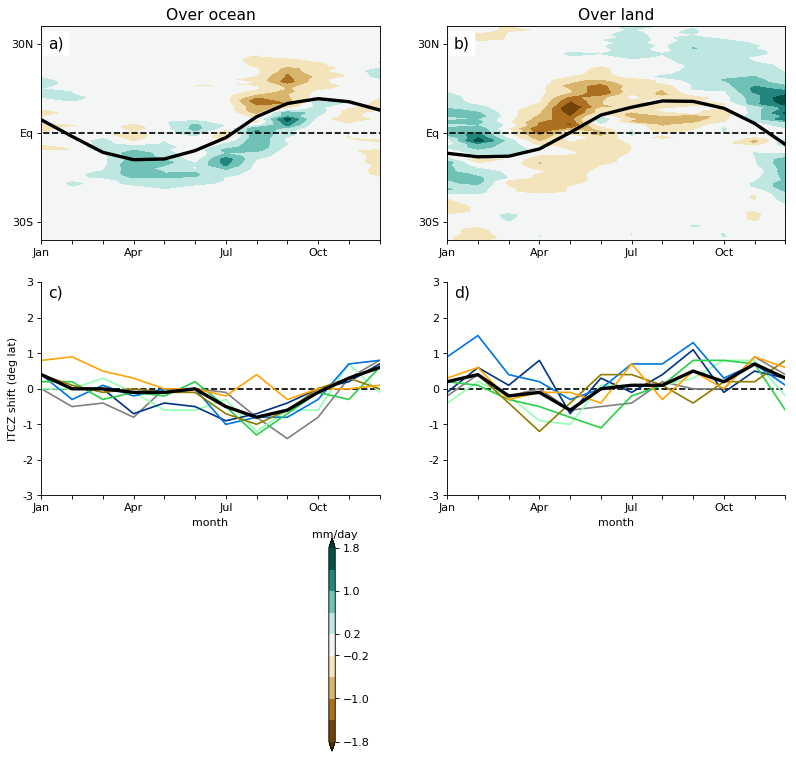

In [12]:
plt.figure(figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
clev = np.array([-1.8, -1.4, -1.0, -0.6, -0.2, 0.2, 0.6, 1.0, 1.4, 1.8])

ax = plt.subplot(3, 2, 1)
c = plt.contourf(month, sinlat, np.transpose(np.nanmedian((pr_ocea_ldor-pr_ocea_ldct)[tm.modlist_ldor], axis=0)), clev, extend='both', cmap=cm.BrBG)
plt.plot([-200, 200], [0, 0], 'k--')
plt.plot(month, np.sin(np.nanmedian(itcz_ocea_ldor, axis=0)*np.pi/180), 'k', linewidth=3)
plt.title('Over ocean', fontsize=14)
plt.xlim(1, 12), plt.ylim(-0.6, 0.6)
ax.xaxis.set_ticks(month)
ax.xaxis.set_ticklabels(['Jan', '', '', 'Apr', '', '', 'Jul', '', '' ,'Oct', '', ''], fontsize=10)
ax.yaxis.set_ticks([-0.5, 0, 0.5])
ax.yaxis.set_ticklabels(['30S', 'Eq', '30N'], fontsize=10) 
plt.text(0.02, 0.92, 'a)', fontsize=14, ha='left', va='center', transform=ax.transAxes, backgroundcolor='white')

ax = plt.subplot(3, 2, 5)
ax.axis('off')
cbar = plt.colorbar(c, ticks=[-1.8, -1.0, -0.2, 0.2, 1.0, 1.8], orientation='vertical', aspect=30)
cbar.ax.tick_params(labelsize=10)
ax.text(1, 1, 'mm/day', fontsize=10)

ax = plt.subplot(3, 2, 2)
plt.contourf(month, sinlat, np.transpose(np.nanmedian((pr_land_ldor-pr_land_ldct)[tm.modlist_ldor], axis=0)), clev, extend='both', cmap=cm.BrBG)
plt.plot([-200, 200], [0, 0], 'k--')
plt.plot(month, np.sin(np.nanmedian(itcz_land_ldct, axis=0)*np.pi/180), 'k', linewidth=3)
plt.title('Over land', fontsize=14)
plt.xlim(1, 12), plt.ylim(-0.6, 0.6)
ax.xaxis.set_ticks(month)
ax.xaxis.set_ticklabels(['Jan', '', '', 'Apr', '', '', 'Jul', '', '' ,'Oct', '', ''], fontsize=10)
ax.yaxis.set_ticks([-0.5, 0, 0.5])
ax.yaxis.set_ticklabels(['30S', 'Eq', '30N'], fontsize=10) 
plt.text(0.02, 0.92, 'b)', fontsize=14, ha='left', va='center', transform=ax.transAxes, backgroundcolor='white')

ax = plt.subplot(3, 2, 3)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.plot([-100, 100], [0, 0], 'k--')
for m in tm.modlist_ldor:
    plt.plot(month, (itcz_ocea_ldor-itcz_ocea_ldct)[m,:], color=tm.modcolors[m])
plt.plot(month, np.nanmedian((itcz_ocea_ldor-itcz_ocea_ldct)[tm.modlist_ldor], axis=0), 'k', linewidth=3)
plt.xlabel('month')
plt.ylabel('ITCZ shift (deg lat)')
plt.xlim(1, 12), plt.ylim(-3, 3)
ax.xaxis.set_ticks(month)
ax.xaxis.set_ticklabels(['Jan', '', '', 'Apr', '', '', 'Jul', '', '' ,'Oct', '', ''], fontsize=10)
ax.yaxis.set_ticks([-3, -2, -1, 0, 1, 2, 3])
ax.yaxis.set_ticklabels([-3, -2, -1, 0, 1, 2, 3], fontsize=10) 
plt.text(0.02, 0.95, 'c)', fontsize=14, ha='left', va='center', transform=ax.transAxes, backgroundcolor='white')

ax = plt.subplot(3, 2, 4)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.plot([-100, 100], [0, 0], 'k--')
for m in tm.modlist_ldor:
    plt.plot(month, (itcz_land_ldor-itcz_land_ldct)[m,:], color=tm.modcolors[m])
plt.plot(month, np.nanmedian((itcz_land_ldor-itcz_land_ldct)[tm.modlist_ldor], axis=0), 'k', linewidth=3)
plt.xlabel('month')
plt.xlim(1, 12), plt.ylim(-3, 3)
ax.xaxis.set_ticks(month)
ax.xaxis.set_ticklabels(['Jan', '', '', 'Apr', '', '', 'Jul', '', '' ,'Oct', '', ''], fontsize=10)
ax.yaxis.set_ticks([-3, -2, -1, 0, 1, 2, 3])
ax.yaxis.set_ticklabels([-3, -2, -1, 0, 1, 2, 3], fontsize=10) 
plt.text(0.02, 0.95, 'd)', fontsize=14, ha='left', va='center', transform=ax.transAxes, backgroundcolor='white')

plt.tight_layout
plt.savefig('figs/corrigendumpaper_figure16.pdf')